# Effect of Payoff Structure

In [2]:
using CSV
using DataFrames
using Statistics: mean
using Plots
using Printf

In [3]:
files = [
    # "log/20250217_145404.csv", "log/20250217_145514.csv", "log/20250217_145605.csv", "log/20250217_153705.csv",
    # "log/20250218_164841.csv", "log/20250218_164850.csv", "log/20250218_164909.csv",
    # "log/20250219_102603.csv", "log/20250219_102608.csv", "log/20250219_102620.csv", "log/20250219_102629.csv",
    # "log/20250819_135357.csv", "log/20250819_140410.csv", # 4 points
    # "log/20250819_195721.csv", # Full
    "log/20250820_073834.csv", "log/20250820_231011.csv", # ちょっと粗め
]
dfs = [CSV.read(file, DataFrame) for file in files]
df = vcat(dfs...)
@show names(df), size(df)

grouping_cols = setdiff(names(df), ["trial", "mean_ϕC", "std_ϕC"])

df = combine(groupby(df, grouping_cols)) do subdf
    n = subdf.trial       # Number of trials
    mu = subdf.mean_ϕC    # Mean cooperation rate for each group
    sigma = subdf.std_ϕC  # Standard deviation for each group

    # Overall mean (weighted by the number of trials)
    mu_total = sum(n .* mu) / sum(n)

    # Overall standard deviation (aggregated variance)
    V_total = sum(n .* (sigma .^ 2)) / sum(n) + sum(n .* (mu .- mu_total) .^ 2) / sum(n)
    sigma_total = sqrt(V_total)

    # Return the aggregated results
    (trial = sum(n), mean_ϕC = mu_total, std_ϕC = sigma_total)
end |> sort
@show names(df), size(df)

combine(
    groupby(df, [:prob_EV, :prob_move, :sor_orientation]),
    :trial => mean => :trial,
    :trial => length => :count
) |> sort

(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (8712, 19))
(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (4356, 19))


Row,prob_EV,prob_move,sor_orientation,trial,count
,Float64,Float64,Float64,Float64,Int64
1,0.0,0.0,0.1,20.0,121
2,0.0,0.2,0.1,20.0,121
3,0.0,0.4,0.1,20.0,121
4,0.0,0.6,0.1,20.0,121
5,0.0,0.8,0.1,20.0,121
6,0.0,1.0,0.1,20.0,121
7,0.1,0.0,0.1,20.0,121
8,0.1,0.2,0.1,20.0,121
9,0.1,0.4,0.1,20.0,121


In [4]:
# const DARK_BLUE = "#2D579A"
# const DARK_RED = "#B32034"
# const DARK_GRAY = "#333333"
# const MID_GRAY = "#BBBBBB"
# const LIGHT_GRAY = "#EEEEEE"
# const COLOR_GRAD = cgrad([DARK_RED, LIGHT_GRAY, DARK_BLUE], [0.0, 0.5, 1.0])

default(
    fontfamily="Arial",
    titlefontsize=14,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    lw = 2,
    margin=5Plots.mm,
    dpi=600,
);

# Heatmap

In [6]:
# function create_values(df::SubDataFrame, x_vec::Vector{Float64}, y_vec::Vector{Float64}, value_type::Symbol)::Matrix{Float64}
#     value_symbol = value_type == :mu ? :mean_ϕC : :std_ϕC
#     values = fill(0.0, length(x_vec), length(y_vec))

#     for (x_index, x_value) in enumerate(x_vec), (y_index, y_value) in enumerate(y_vec)
#         _v = df[df.T .== x_value .&& df.S .== y_value, value_symbol]
#         if !isempty(_v)
#             values[y_index, x_index] = _v[1]
#             # values[x_index, y_index] = _v[1]
#         end
#     end

#     return values
# end

# function display_heatmap(x_vec::Vector{Float64}, y_vec::Vector{Float64}, values::Matrix{Float64}, title::String, value_type::Symbol)::Nothing
#     color = value_type == :mu ? COLOR_GRAD : :grays
#     clim = value_type == :mu ? (0.0, 1.0) : (0.0, 0.2)
    
#     # Create heatmap
#     p = heatmap(
#         x_vec,
#         y_vec,
#         values,
#         color = color,
#         clim = clim,
#         title = title,
#         xlabel = "T",
#         xticks = 0:0.2:2,
#         xlim = (-0.05, 2.05),
#         ylabel = "S",
#         yticks = -1:0.2:1,
#         ylim = (-1.05, 1.05),
#     )
#     plot!([-0.05, 2.05], [0, 0], color=:black, linewidth=1, label = false)
#     plot!([1, 1], [-1.05, 1.05], color=:black, linewidth=1, label = false)

#     display(p)
#     savefig("img/$(title).png")

#     return
# end

# for _df in groupby(df, [:N, :sor_vec, :prob_EV, :prob_move, :sor_orientation])
#     T_vec = sort(collect(Set(_df.T)))
#     S_vec = sort(collect(Set(_df.S)))

#     title_sor = length(_df.sor_vec[1]) >= 13 ? "2-SoR" : "1-SoR"
#     title = "N=$(_df.N[1]), $(title_sor), pEV=$(_df.prob_EV[1]), pMV=$(_df.prob_move[1]), α=$(_df.sor_orientation[1])"

#     mu_data = create_values(_df, T_vec, S_vec, :mu)
#     display_heatmap(T_vec, S_vec, mu_data, title, :mu)

    # sigma_data = create_values(_df, T_vec, S_vec, :sigma)
    # display_heatmap(T_vec,  S_vec, sigma_data, "SD ϕC $(title)", :sigma)
# end;

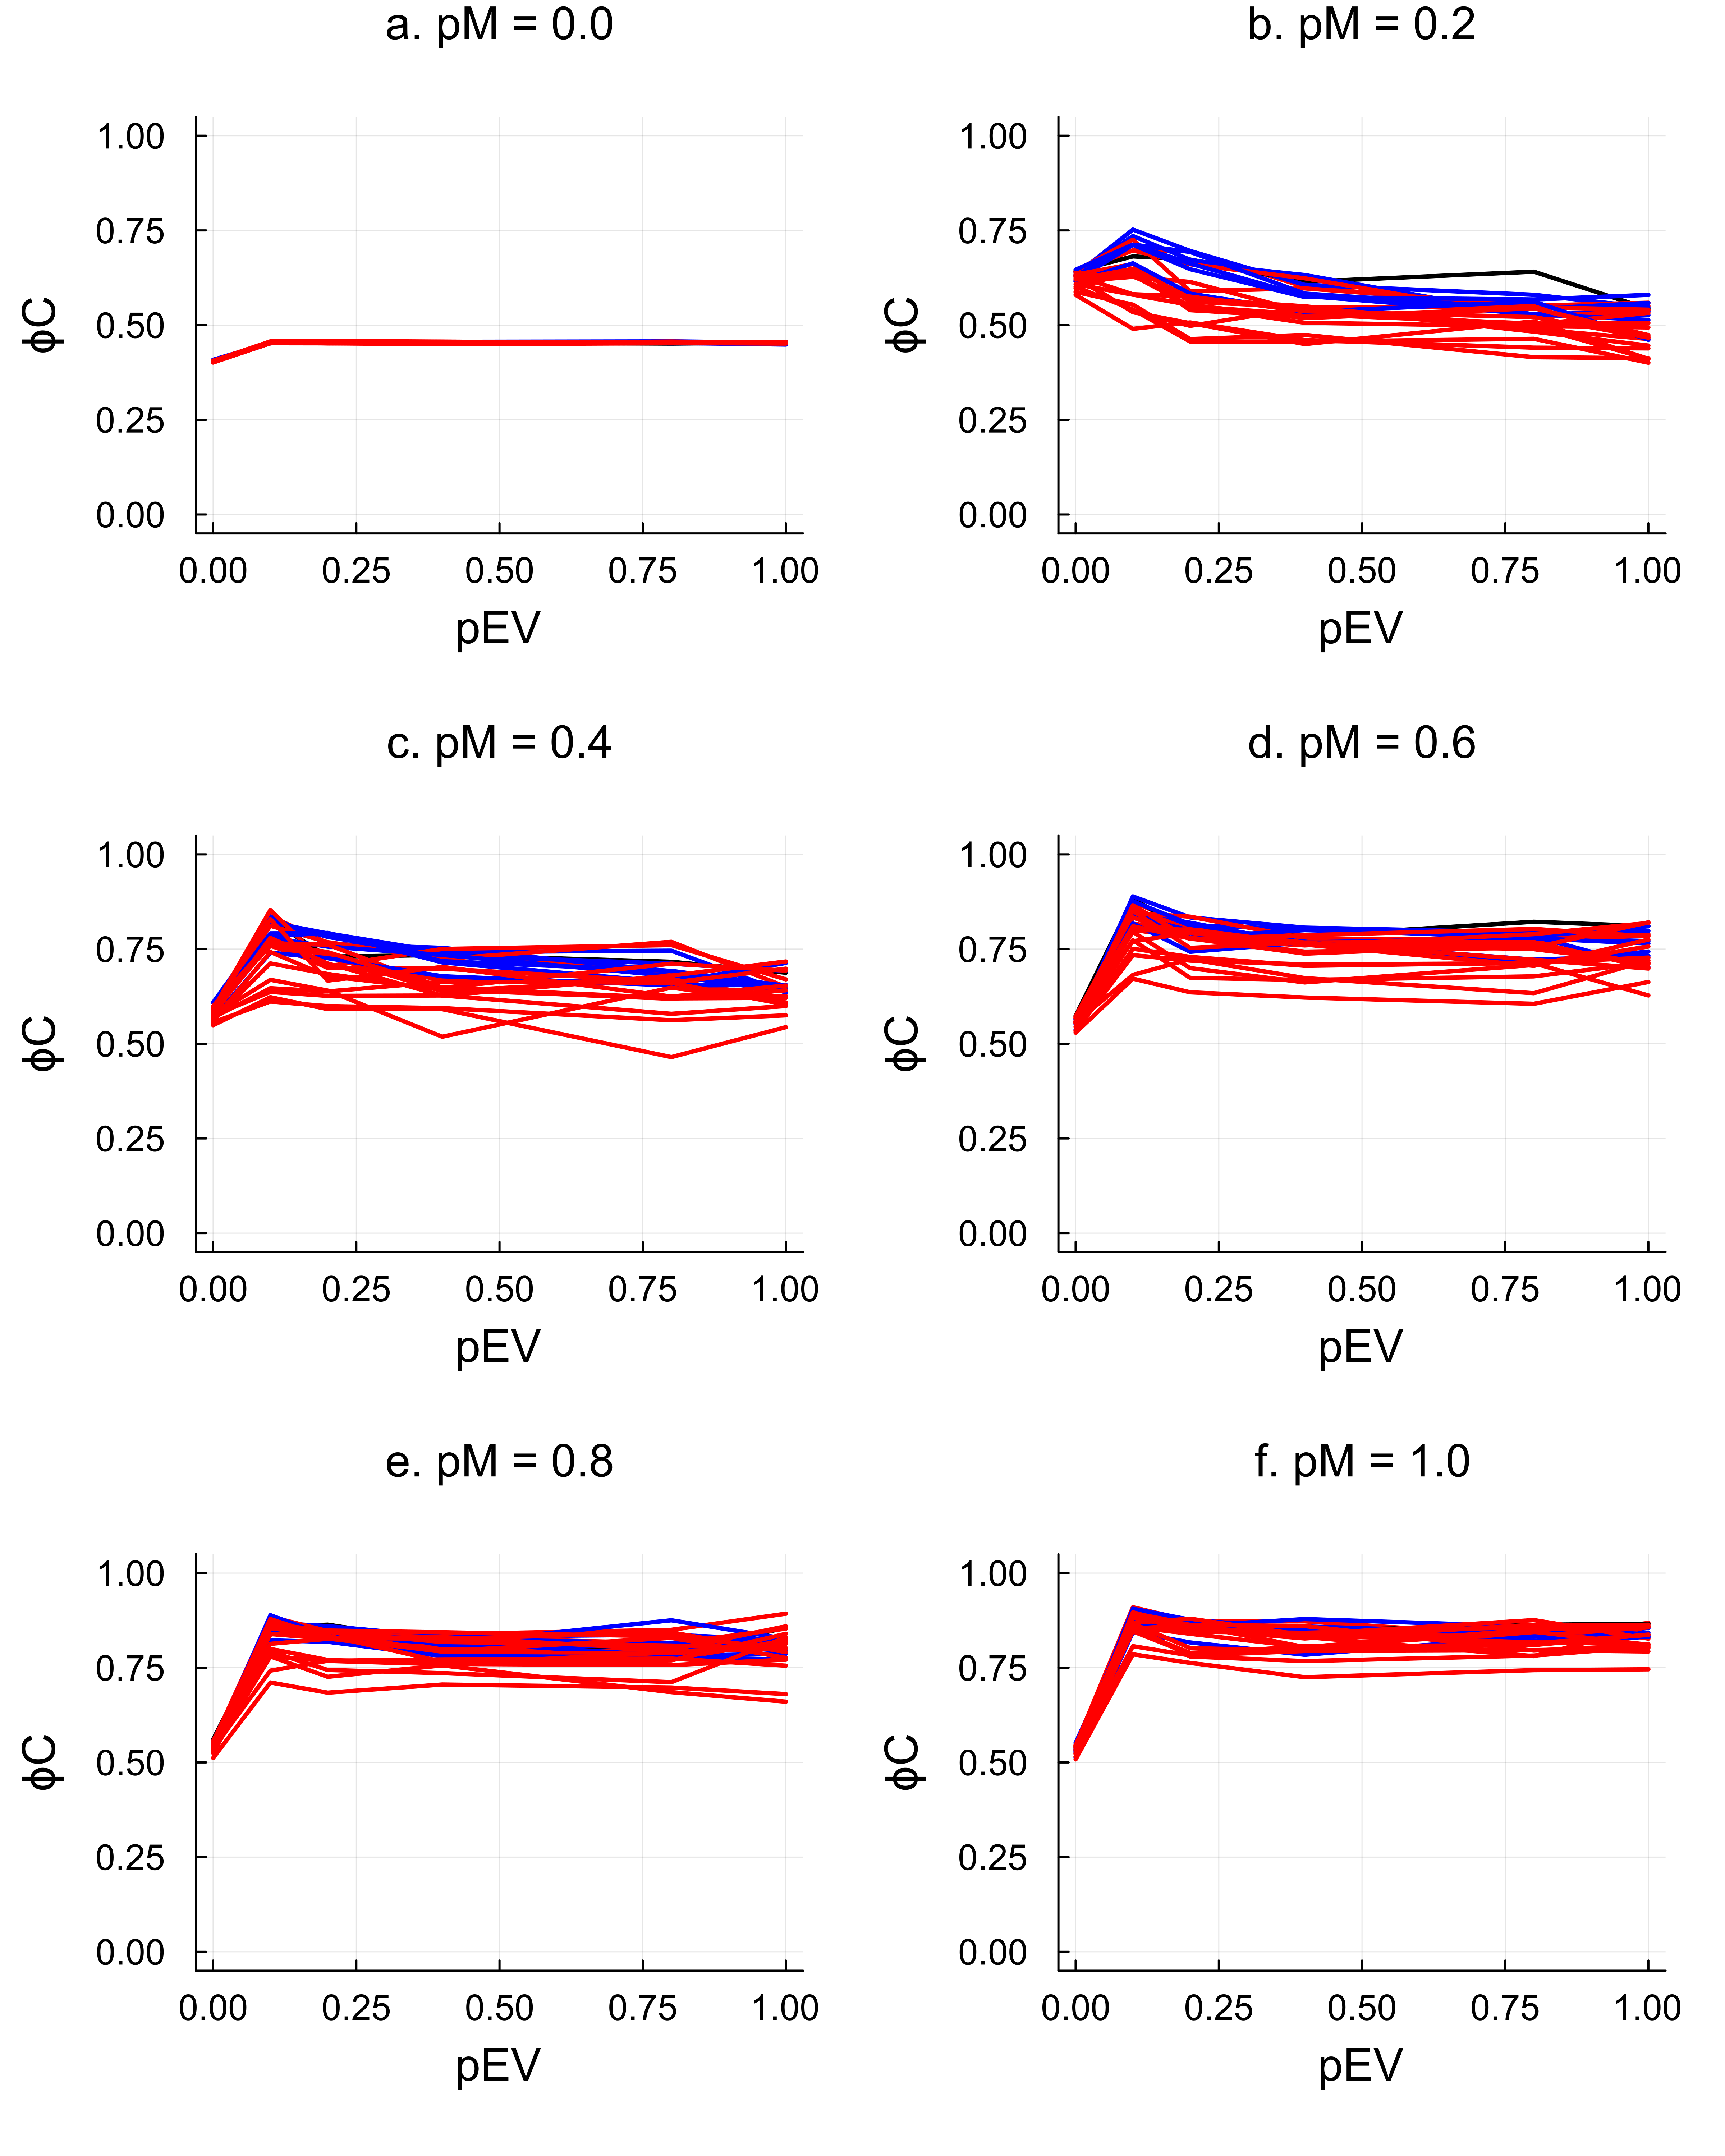

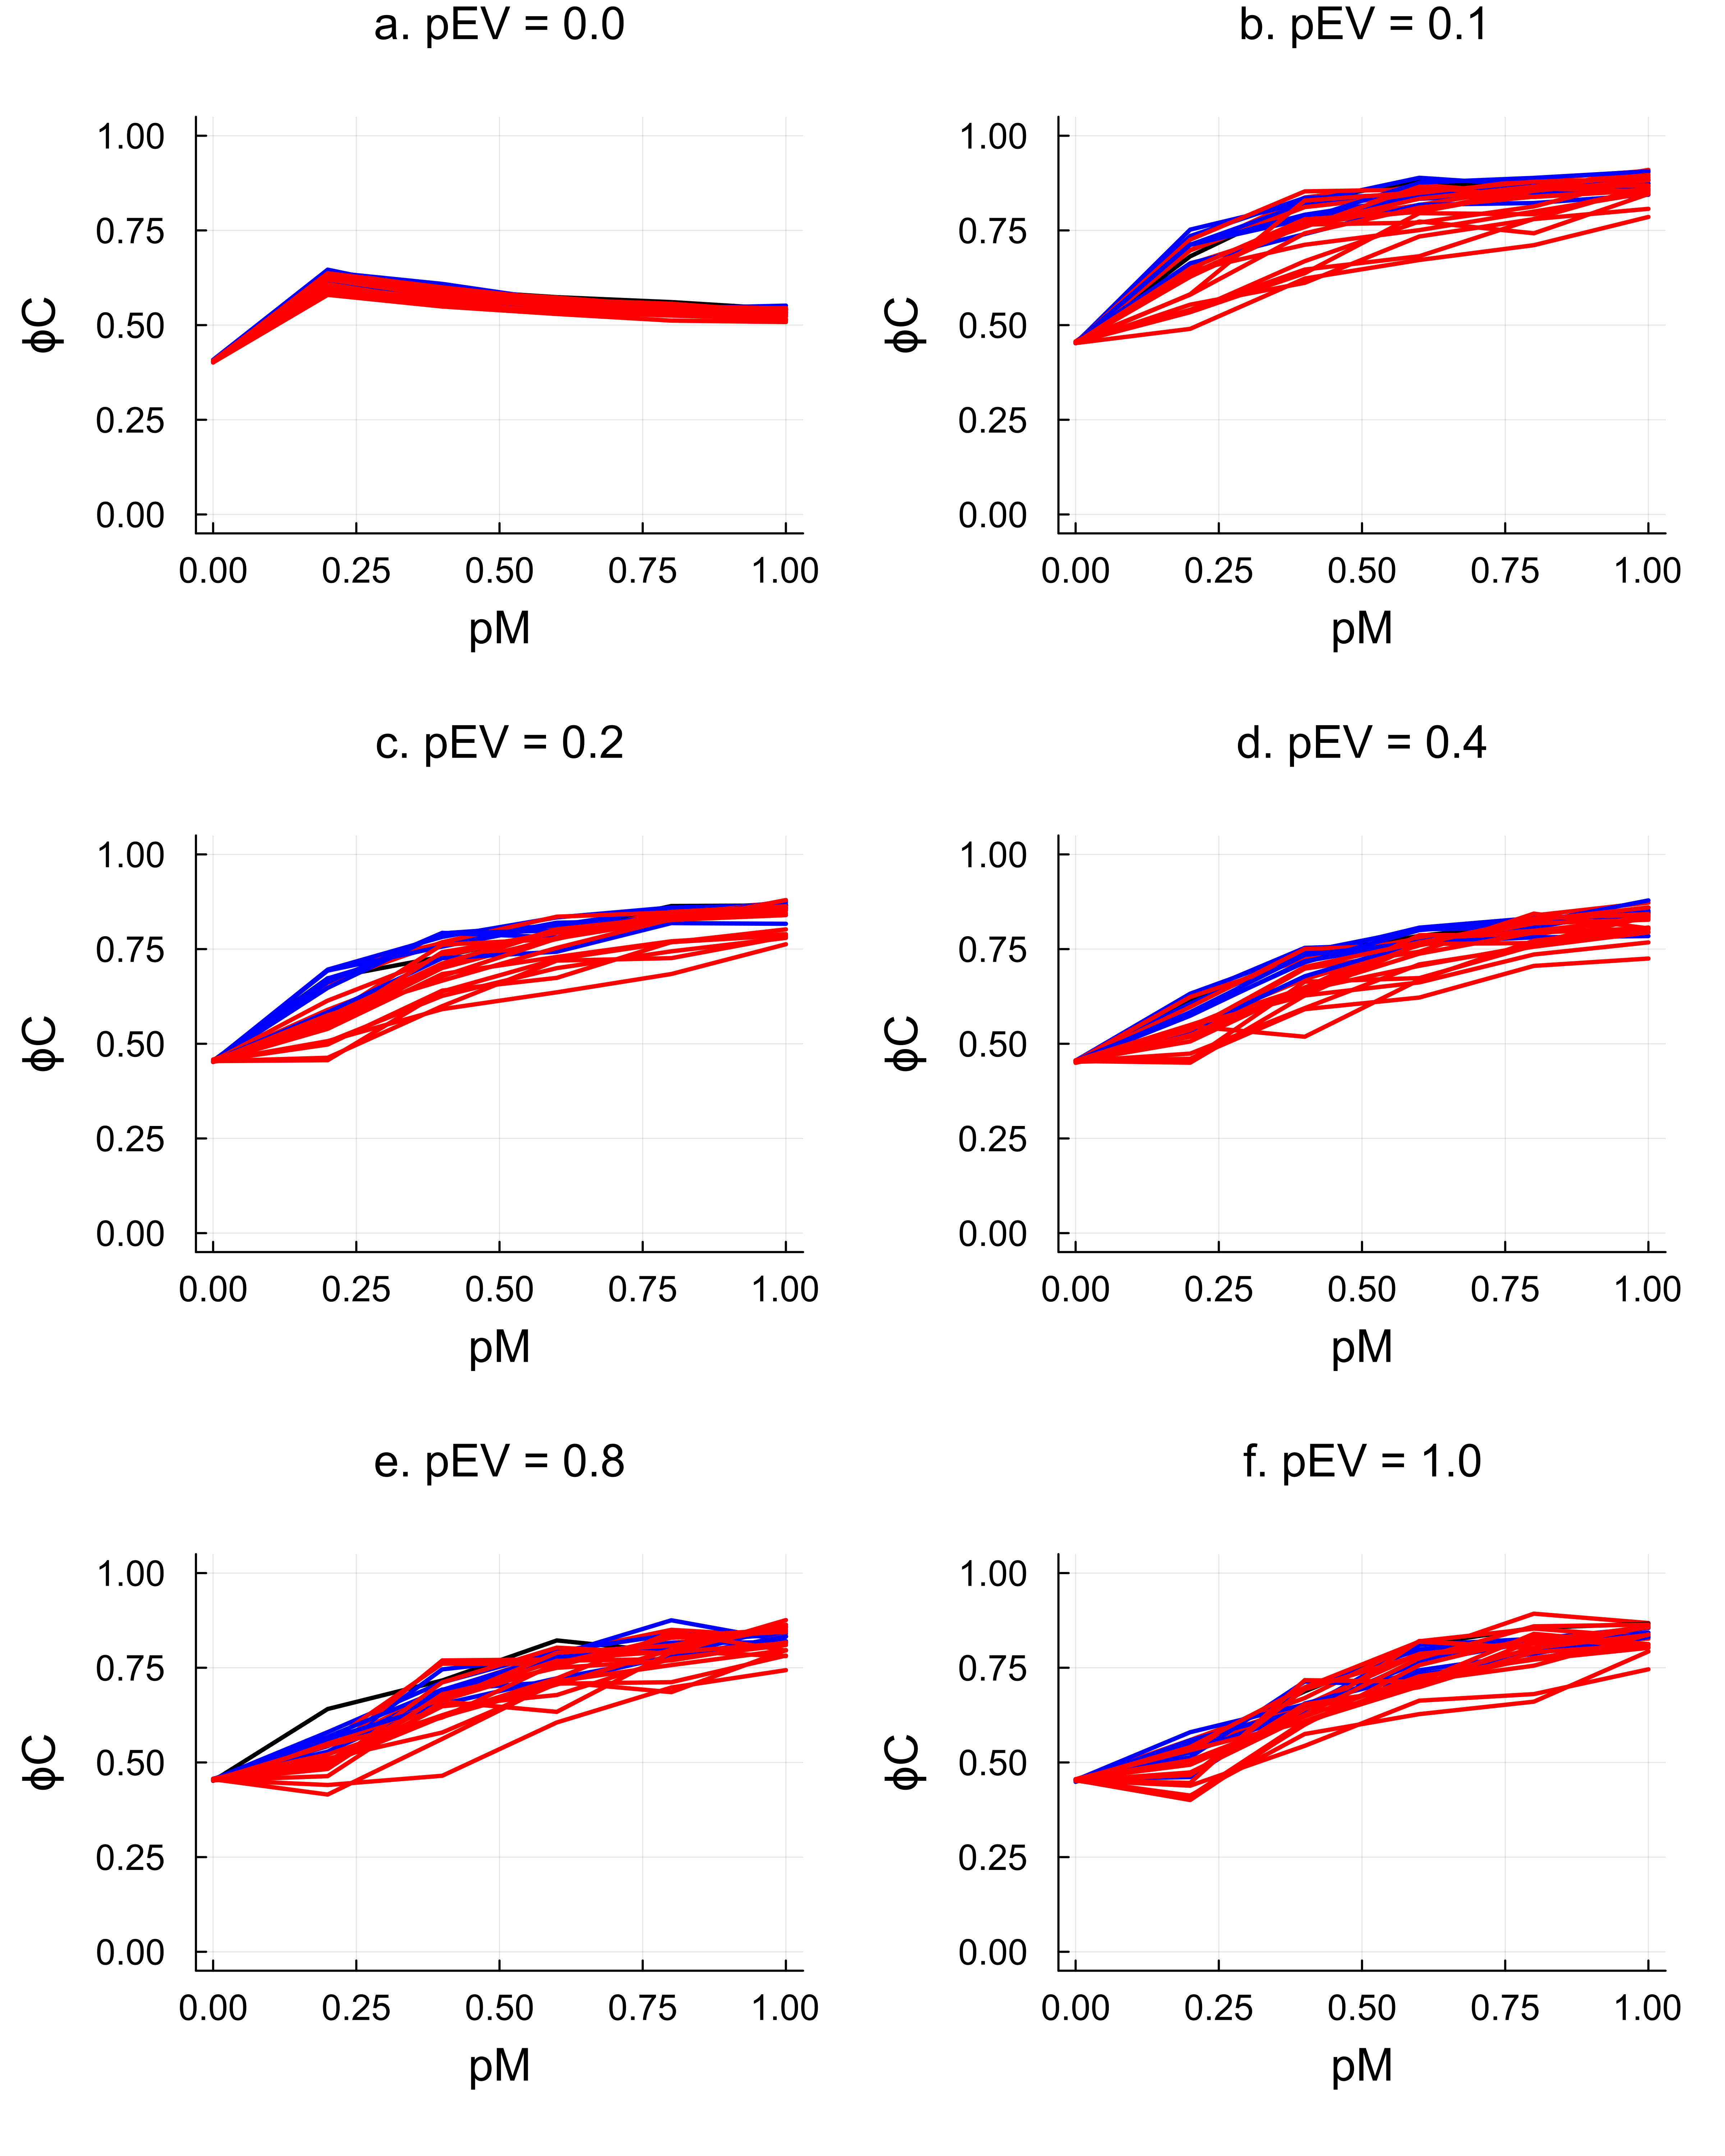

In [31]:
@assert sort(unique(df.T)) == [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
@assert sort(unique(df.S)) == [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# 全領域
# T_list = sort(unique(df.T))
# S_list = sort(unique(df.S))

# upper left (no dilemma)
# T_list = [0.0, 0.2, 0.4, 0.6, 0.8]
# S_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# bottom left (stag hunt)
# T_list = [0.0, 0.2, 0.4, 0.6, 0.8]
# S_list = [-1.0, -0.8, -0.6, -0.4, -0.2]

# upper right (snowdrift)
# T_list = [1.2, 1.4, 1.6, 1.8, 2.0]
# S_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# bottom right (prisoner's dilemma)
T_list = [1.2, 1.4, 1.6, 1.8, 2.0]
S_list = [-1.0, -0.8, -0.6, -0.4, -0.2]


line_color(T::Float64, S::Float64) = if S > T
    :blue
elseif S == T
    :black
elseif S > T - 1
    :red
elseif S == T - 1
    :black
elseif S > T - 2
    :blue
elseif S == T - 2
    :black
elseif S < T - 2
    :red
end

plot_list = []
figure_labels = 'a':'z'

for (i, pM) in enumerate(sort(unique(df.prob_move)))
    title = "$(figure_labels[i]). pM = $(pM)"
    p = plot(title = title, xlabel = "pEV", ylabel = "ϕC", ylim = (-0.05, 1.05), legend = false, legend_columns = 2)
    
    for T in T_list, S in S_list
        temp_df = df[df.prob_move .== pM .&& df.T .== T .&& df.S .== S, [:prob_EV, :mean_ϕC]]
        plot!(temp_df.prob_EV, temp_df.mean_ϕC, label = "($(T), $(S))", color = line_color(T, S))
        # println("($(T), $(S)): $(round.(temp_df.mean_ϕC, digits=2))")
    end

    push!(plot_list, p)
end;

plots = plot(plot_list..., layout=(3, 2), size=(800, 1000))
display(plots)
savefig("img/SM2_prisoners_dilemma_pM.png")

plot_list = []

for (i, pEV) in enumerate(sort(unique(df.prob_EV)))
    title = "$(figure_labels[i]). pEV = $(pEV)"
    p = plot(title = title, xlabel = "pM", ylabel = "ϕC", ylim = (-0.05, 1.05), legend = false, legend_columns = 2)
    
    for T in T_list, S in S_list
        temp_df = df[df.prob_EV .== pEV .&& df.T .== T .&& df.S .== S, [:prob_move, :mean_ϕC]]
        plot!(temp_df.prob_move, temp_df.mean_ϕC, label = "($(T), $(S))", color = line_color(T, S))
        # println("($(T), $(S)): $(round.(temp_df.mean_ϕC, digits=2))")
    end
    
    push!(plot_list, p)
end

plots = plot(plot_list..., layout=(3, 2), size=(800, 1000))
display(plots)
savefig("img/SM2_prisoners_dilemma_pEV.png");

In [8]:
df[(df.prob_EV .== 0.8 .|| df.prob_EV .== 1.0) .&& df.prob_move .== 0.2 .&& df.T .== 0.4 .&& df.S .== 0.2, [:prob_EV, :T, :S, :mean_ϕC, :std_ϕC]]

Row,prob_EV,T,S,mean_ϕC,std_ϕC
,Float64,Float64,Float64,Float64,Float64
1,0.8,0.4,0.2,0.65735,0.106434
2,1.0,0.4,0.2,0.71375,0.119111


In [9]:
mean(df.std_ϕC)

0.051079232073961436